<a href="https://colab.research.google.com/github/nprimavera/Laser-Cutting/blob/main/FINAL_LASER_CUTTER_BOX_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Generating a Fractal - general usage

import matplotlib.pyplot as plt
import numpy as np

class Vector:                     # REMINDER: class --> defines the attributes and bahaviors of the vector
    def __init__(self, x, y):     # REMINDER: init function --> special method in a class that is called when an object is created - initializes object's attributes
        self.x = x                # instance variable for x
        self.y = y                # instance variable for y

class AffineTransform:
    def __init__(self, a, b, c, d, e, f):   # initializes object's attributes
        self.a = a    # instance variables
        self.b = b
        self.c = c
        self.d = d
        self.e = e
        self.f = f

def recursivePlot(vector, transforms, num_transforms, current_depth, max_depth, ax):  # recursive plot function w/ specified params
    if current_depth == max_depth:          # base case: current recursion depth equals maximum recursion depth
        ax.plot(vector.x, vector.y, 'ro')   # if true --> recursivePlot will plot the Vector with a call to ax.plot and return
        return

# apply affine transformations to the vector
    for transform in transforms:            # loops through all the transformations in the array
        new_x = transform.a * vector.x + transform.b * vector.y + transform.e
        new_y = transform.c * vector.x + transform.d * vector.y + transform.f
        new_vector = Vector(new_x, new_y)   # calculates a new vector for each transformation
        recursivePlot(new_vector, transforms, num_transforms, current_depth + 1, max_depth, ax)

def drawFractal(startPoint, transforms, max_depth):   # draws the fractal w/ specified params
    fig, ax = plt.subplots()                          # ax plot allows the function to plot on the same set of axes throughout its recursive calls
    num_transforms = len(transforms)                  # the number of transforms is equal to the amount/length of transforms - defined in usage
    recursivePlot(startPoint, transforms, num_transforms, 0, max_depth, ax)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Sierpinski triangle')
    ax.grid(True)
    plt.savefig('fractal.svg', format='svg')          # saves the fractal as an svg file

Enter the x-coordinate of the starting point (in inches, maximum 12): 5
Enter the y-coordinate of the starting point (in inches, maximum 18): 3


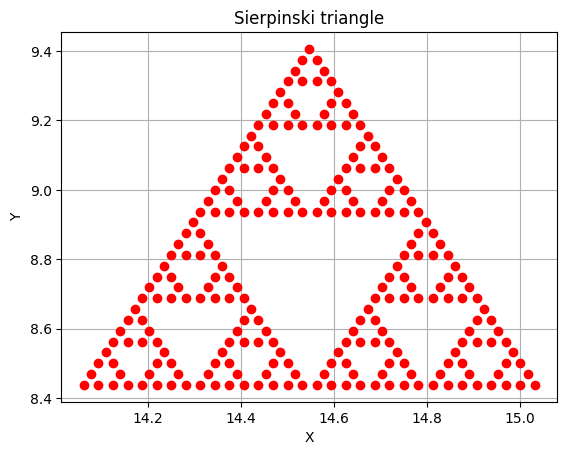

In [4]:
# Example usage - using the Sierpinski triangle for this example

# Starting point of the fractal - from user input
def user_input():
    while True:
        try:
            x = int(input("Enter the x-coordinate of the starting point (in inches, maximum 12): ")) * 90   # 90 pixels per inch
            y = int(input("Enter the y-coordinate of the starting point (in inches, maximum 18): ")) * 90
            if 0 <= x <= 1080 and 0 <= y <= 1620:  # Check if coordinates are within constraints
                return Vector(x, y)
            else:
                print("Error: Coordinates must be within 12 inches for x and 18 inches for y.")
        except ValueError:
            print("Error: Invalid input. Please enter valid numerical values for coordinates.")

if __name__ == "__main__":
    startPoint = user_input()

    # Define transformations for Sierpinski triangle
    transforms = [
        AffineTransform(0.5, 0, 0, 0.5, 0, 0),   # Scale down by 1/2
        AffineTransform(0.5, 0, 0, 0.5, 0.5, 0), # Scale down by 1/2 and move right by 0.5
        AffineTransform(0.5, 0, 0, 0.5, 0.25, 0.5) # Scale down by 1/2, move right by 0.25, and up by 0.5
    ]

    # Calculate maximum recursion depth
    max_depth = 5

    # Execute the draw fractal function
    drawFractal(startPoint, transforms, max_depth)

Enter the desired height of your box to the nearest whole inch: 5
Enter the desired width of your box to the nearest whole inch: 5


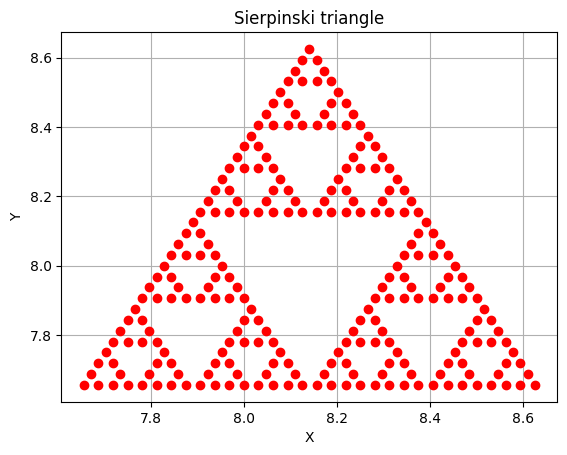

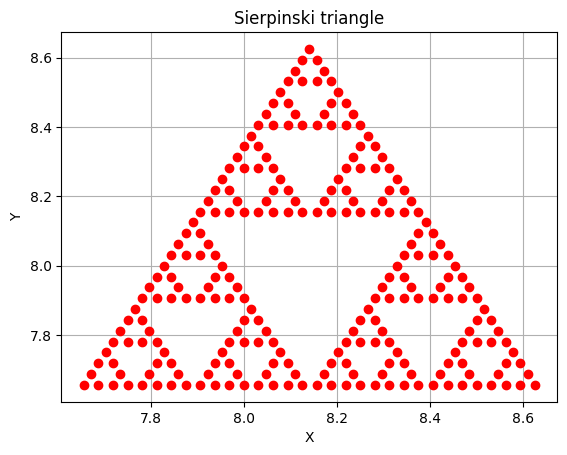

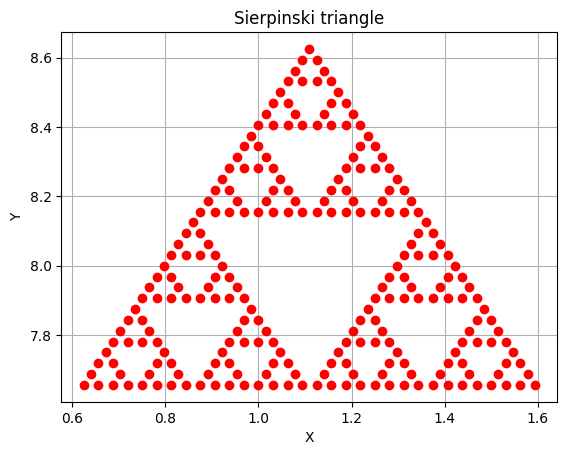

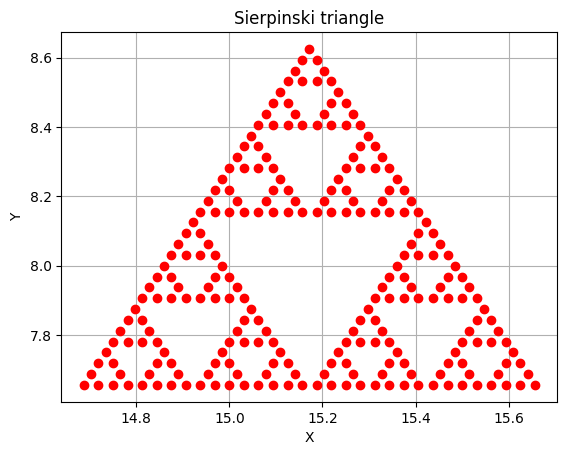

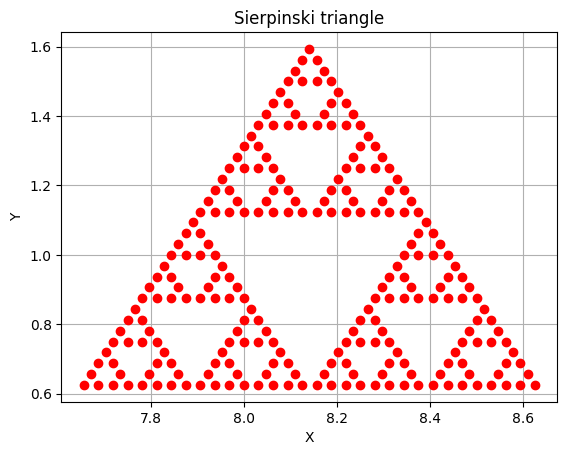

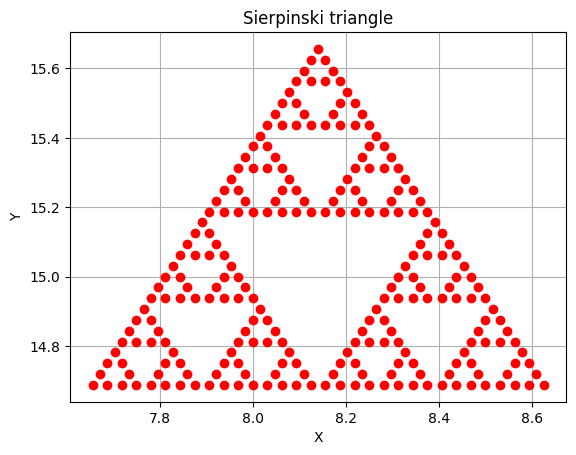

In [15]:
# Define box variables based off user input
box_height = int(input("Enter the desired height of your box to the nearest whole inch: ")) * 90
box_width = int(input("Enter the desired width of your box to the nearest whole inch: ")) * 90

dovetail_width = 11
slot_width = 10  # Width of the slot
slot_height = 5  # Height of the slot

def drawBox(height, width, x_initial, y_initial):
    # Define corner points of the box
    x1 = x_initial
    y1 = y_initial
    x2 = x1
    y2 = y1 + height
    x3 = x1 + width
    y3 = y1
    x4 = x3
    y4 = y2

    # Calculate center points of the sides for fractal
    side1_center = Vector(x1 + width / 2, y1)  # Top side
    side2_center = Vector(x1, y1 + height / 2)  # Left side
    side3_center = Vector(x3, y3 + height / 2)  # Right side
    side4_center = Vector(x1 + width / 2, y1 + height)  # Bottom side
    side5_center = Vector(x1 + width / 2, y1 + height / 2)  # Front side
    side6_center = Vector(x1 + width / 2, y1 + height / 2)  # Back side

    # Define SVG file content
    svg_content = f'''
    <svg width="{width + 40}" height="{height + 40}" xmlns="http://www.w3.org/2000/svg">
        <!-- Front side -->
        <line x1="{x1}" y1="{y1}" x2="{x3}" y2="{y3}" stroke="black" stroke-width="1"/>
        <line x1="{x1}" y1="{y1}" x2="{x1 + dovetail_width}" y2="{y1}" stroke="black" stroke-width="1"/>
        <line x1="{x3}" y1="{y3}" x2="{x3 - dovetail_width}" y2="{y3}" stroke="black" stroke-width="1"/>
        <line x1="{x1 + dovetail_width}" y1="{y1}" x2="{x1 + dovetail_width}" y2="{y1 + dovetail_width}" stroke="black" stroke-width="1"/>
        <line x1="{x3 - dovetail_width}" y1="{y3}" x2="{x3 - dovetail_width}" y2="{y3 + dovetail_width}" stroke="black" stroke-width="1"/>
        <line x1="{x1 + dovetail_width}" y1="{y1 + dovetail_width}" x2="{x3 - dovetail_width}" y2="{y3 + dovetail_width}" stroke="black" stroke-width="1"/>
        {drawFractal(side5_center, transforms, max_depth)}

        <!-- Back side -->
        <line x1="{x2}" y1="{y2}" x2="{x4}" y2="{y4}" stroke="black" stroke-width="1"/>
        <line x1="{x2}" y1="{y2}" x2="{x2 + dovetail_width}" y2="{y2}" stroke="black" stroke-width="1"/>
        <line x1="{x4}" y1="{y4}" x2="{x4 - dovetail_width}" y2="{y4}" stroke="black" stroke-width="1"/>
        <line x1="{x2 + dovetail_width}" y1="{y2}" x2="{x2 + dovetail_width}" y2="{y2 - dovetail_width}" stroke="black" stroke-width="1"/>
        <line x1="{x4 - dovetail_width}" y1="{y4}" x2="{x4 - dovetail_width}" y2="{y4 - dovetail_width}" stroke="black" stroke-width="1"/>
        <line x1="{x2 + dovetail_width}" y1="{y2 - dovetail_width}" x2="{x4 - dovetail_width}" y2="{y4 - dovetail_width}" stroke="black" stroke-width="1"/>
        {drawFractal(side6_center, transforms, max_depth)}

        <!-- Left side with slot -->
        <line x1="{x1}" y1="{y1}" x2="{x2}" y2="{y2}" stroke="black" stroke-width="1"/>
        <line x1="{x1}" y1="{y1}" x2="{x1}" y2="{y1 + slot_height}" stroke="black" stroke-width="1"/>
        <line x1="{x2}" y1="{y2}" x2="{x2}" y2="{y2 - slot_height}" stroke="black" stroke-width="1"/>
        <line x1="{x1}" y1="{y1 + slot_height // 2}" x2="{x2}" y2="{y2 - slot_height // 2}" stroke="black" stroke-width="1"/>
        {drawFractal(side2_center, transforms, max_depth)}

        <!-- Right side with slot -->
        <line x1="{x3}" y1="{y3}" x2="{x4}" y2="{y4}" stroke="black" stroke-width="1"/>
        <line x1="{x3}" y1="{y3}" x2="{x3}" y2="{y3 + slot_height}" stroke="black" stroke-width="1"/>
        <line x1="{x4}" y1="{y4}" x2="{x4}" y2="{y4 - slot_height}" stroke="black" stroke-width="1"/>
        <line x1="{x3}" y1="{y3 + slot_height // 2}" x2="{x4}" y2="{y4 - slot_height // 2}" stroke="black" stroke-width="1"/>
        {drawFractal(side3_center, transforms, max_depth)}

        <!-- Top side with dovetail -->
        <line x1="{x1}" y1="{y1}" x2="{x3}" y2="{y3}" stroke="black" stroke-width="1"/>
        <line x1="{x1}" y1="{y1}" x2="{x1 + dovetail_width}" y2="{y1}" stroke="black" stroke-width="1"/>
        <line x1="{x3}" y1="{y3}" x2="{x3 - dovetail_width}" y2="{y3}" stroke="black" stroke-width="1"/>
        <line x1="{x1 + dovetail_width}" y1="{y1}" x2="{x1 + dovetail_width}" y2="{y1 + dovetail_width}" stroke="black" stroke-width="1"/>
        <line x1="{x3 - dovetail_width}" y1="{y3}" x2="{x3 - dovetail_width}" y2="{y3 + dovetail_width}" stroke="black" stroke-width="1"/>
        <line x1="{x1 + dovetail_width}" y1="{y1 + dovetail_width}" x2="{x3 - dovetail_width}" y2="{y3 + dovetail_width}" stroke="black" stroke-width="1"/>
        {drawFractal(side1_center, transforms, max_depth)}

        <!-- Bottom side with dovetail -->
        <line x1="{x2}" y1="{y2}" x2="{x4}" y2="{y4}" stroke="black" stroke-width="1"/>
        <line x1="{x2}" y1="{y2}" x2="{x2 + dovetail_width}" y2="{y2}" stroke="black" stroke-width="1"/>
        <line x1="{x4}" y1="{y4}" x2="{x4 - dovetail_width}" y2="{y4}" stroke="black" stroke-width="1"/>
        <line x1="{x2 + dovetail_width}" y1="{y2}" x2="{x2 + dovetail_width}" y2="{y2 - dovetail_width}" stroke="black" stroke-width="1"/>
        <line x1="{x4 - dovetail_width}" y1="{y4}" x2="{x4 - dovetail_width}" y2="{y4 - dovetail_width}" stroke="black" stroke-width="1"/>
        <line x1="{x2 + dovetail_width}" y1="{y2 - dovetail_width}" x2="{x4 - dovetail_width}" y2="{y4 - dovetail_width}" stroke="black" stroke-width="1"/>
        {drawFractal(side4_center, transforms, max_depth)}
    </svg>
    '''

    # Write SVG content to a file
    svg_filename = "dovetail_box.svg"
    with open(svg_filename, "w") as svg_file:
        svg_file.write(svg_content)

if __name__ == "__main__":
    drawBox(box_height, box_width, 20, 20)

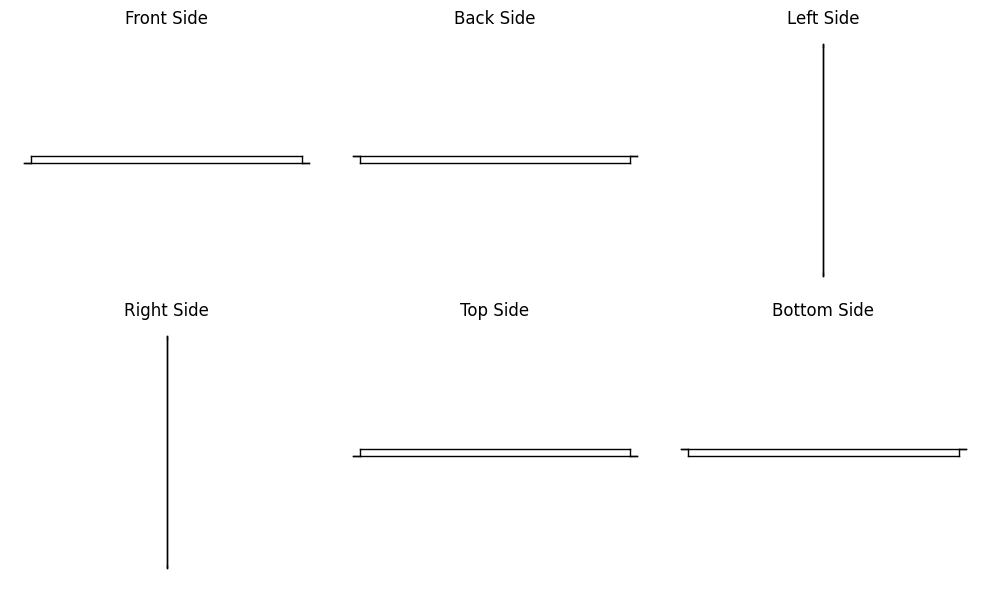

In [17]:
# Display box

import matplotlib.pyplot as plt

def drawBox(height, width, x_initial, y_initial):
    dovetail_width = 11
    slot_width = 10  # Width of the slot
    slot_height = 5  # Height of the slot

    # Define corner points of the box
    x1 = x_initial
    y1 = y_initial
    x2 = x1
    y2 = y1 + height
    x3 = x1 + width
    y3 = y1
    x4 = x3
    y4 = y2

    # Create a new figure
    fig, ax = plt.subplots(2, 3, figsize=(10, 6))

    # Front side
    ax[0, 0].plot([x1, x3], [y1, y3], 'k-', linewidth=1)
    ax[0, 0].plot([x1, x1 + dovetail_width], [y1, y1], 'k-', linewidth=1)
    ax[0, 0].plot([x3, x3 - dovetail_width], [y3, y3], 'k-', linewidth=1)
    ax[0, 0].plot([x1 + dovetail_width, x1 + dovetail_width], [y1, y1 + dovetail_width], 'k-', linewidth=1)
    ax[0, 0].plot([x3 - dovetail_width, x3 - dovetail_width], [y3, y3 + dovetail_width], 'k-', linewidth=1)
    ax[0, 0].plot([x1 + dovetail_width, x3 - dovetail_width], [y1 + dovetail_width, y3 + dovetail_width], 'k-', linewidth=1)
    ax[0, 0].axis('equal')
    ax[0, 0].axis('off')
    ax[0, 0].set_title('Front Side')

    # Back side
    ax[0, 1].plot([x2, x4], [y2, y4], 'k-', linewidth=1)
    ax[0, 1].plot([x2, x2 + dovetail_width], [y2, y2], 'k-', linewidth=1)
    ax[0, 1].plot([x4, x4 - dovetail_width], [y4, y4], 'k-', linewidth=1)
    ax[0, 1].plot([x2 + dovetail_width, x2 + dovetail_width], [y2, y2 - dovetail_width], 'k-', linewidth=1)
    ax[0, 1].plot([x4 - dovetail_width, x4 - dovetail_width], [y4, y4 - dovetail_width], 'k-', linewidth=1)
    ax[0, 1].plot([x2 + dovetail_width, x4 - dovetail_width], [y2 - dovetail_width, y4 - dovetail_width], 'k-', linewidth=1)
    ax[0, 1].axis('equal')
    ax[0, 1].axis('off')
    ax[0, 1].set_title('Back Side')

    # Left side
    ax[0, 2].plot([x1, x2], [y1, y2], 'k-', linewidth=1)
    ax[0, 2].plot([x1, x1], [y1, y1 + slot_height], 'k-', linewidth=1)
    ax[0, 2].plot([x2, x2], [y2, y2 - slot_height], 'k-', linewidth=1)
    ax[0, 2].plot([x1, x2], [y1 + slot_height // 2, y2 - slot_height // 2], 'k-', linewidth=1)
    ax[0, 2].axis('equal')
    ax[0, 2].axis('off')
    ax[0, 2].set_title('Left Side')

    # Right side
    ax[1, 0].plot([x3, x4], [y3, y4], 'k-', linewidth=1)
    ax[1, 0].plot([x3, x3], [y3, y3 + slot_height], 'k-', linewidth=1)
    ax[1, 0].plot([x4, x4], [y4, y4 - slot_height], 'k-', linewidth=1)
    ax[1, 0].plot([x3, x4], [y3 + slot_height // 2, y4 - slot_height // 2], 'k-', linewidth=1)
    ax[1, 0].axis('equal')
    ax[1, 0].axis('off')
    ax[1, 0].set_title('Right Side')

    # Top side
    ax[1, 1].plot([x1, x3], [y1, y3], 'k-', linewidth=1)
    ax[1, 1].plot([x1, x1 + dovetail_width], [y1, y1], 'k-', linewidth=1)
    ax[1, 1].plot([x3, x3 - dovetail_width], [y3, y3], 'k-', linewidth=1)
    ax[1, 1].plot([x1 + dovetail_width, x1 + dovetail_width], [y1, y1 + dovetail_width], 'k-', linewidth=1)
    ax[1, 1].plot([x3 - dovetail_width, x3 - dovetail_width], [y3, y3 + dovetail_width], 'k-', linewidth=1)
    ax[1, 1].plot([x1 + dovetail_width, x3 - dovetail_width], [y1 + dovetail_width, y3 + dovetail_width], 'k-', linewidth=1)
    ax[1, 1].axis('equal')
    ax[1, 1].axis('off')
    ax[1, 1].set_title('Top Side')

    # Bottom side
    ax[1, 2].plot([x2, x4], [y2, y4], 'k-', linewidth=1)
    ax[1, 2].plot([x2, x2 + dovetail_width], [y2, y2], 'k-', linewidth=1)
    ax[1, 2].plot([x4, x4 - dovetail_width], [y4, y4], 'k-', linewidth=1)
    ax[1, 2].plot([x2 + dovetail_width, x2 + dovetail_width], [y2, y2 - dovetail_width], 'k-', linewidth=1)
    ax[1, 2].plot([x4 - dovetail_width, x4 - dovetail_width], [y4, y4 - dovetail_width], 'k-', linewidth=1)
    ax[1, 2].plot([x2 + dovetail_width, x4 - dovetail_width], [y2 - dovetail_width, y4 - dovetail_width], 'k-', linewidth=1)
    ax[1, 2].axis('equal')
    ax[1, 2].axis('off')
    ax[1, 2].set_title('Bottom Side')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    drawBox(box_height, box_width, 20, 20)